In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
iris= datasets.load_iris()

In [2]:
X_realdata = iris.data[:, :4]
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target

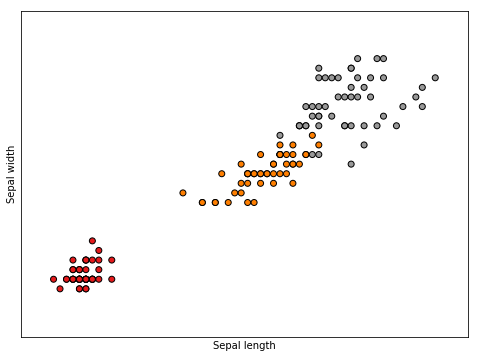

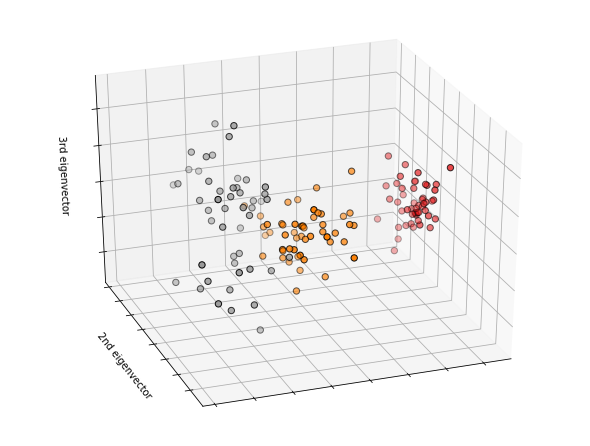

In [3]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x1_mean,x2_mean=X[:,0].mean(),X[:,1].mean()
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))


ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=4).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 2], X_reduced[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [5]:
def iris_class_splice(a):
    iris_setosa=a[0:50,:]
    iris_versicolor=a[50:100,:]
    iris_verginica=a[100:150,:]
    return iris_setosa,iris_versicolor,iris_verginica

In [6]:
def iris_class_mean_calc(data):
    Iris_means=[0,0,0,0]
    for i in range(data.__len__()):
            Iris_means[0]=Iris_means[0]+data[i,0]
            Iris_means[1]=Iris_means[1]+data[i,1]
            Iris_means[2]=Iris_means[2]+data[i,2]
            Iris_means[3]=Iris_means[3]+data[i,3]
    for j in range(4):
        Iris_means[j]=Iris_means[j]/50
    return Iris_means

In [7]:
def iris_class_varyans_and_standart_sapma_calc(data,data_mean):
    Iris_varyans=np.zeros((4))
    Iris_standart_sapma=np.zeros((4))
    for j in range(data.__len__()):
        Iris_varyans[0]+=(data_mean[0]-data[j,0])**2
        Iris_varyans[1]+=(data_mean[1]-data[j,1])**2
        Iris_varyans[2]+=(data_mean[2]-data[j,2])**2
        Iris_varyans[3]+=(data_mean[3]-data[j,3])**2
    for j in range(4):
        Iris_varyans[j]=Iris_varyans[j]/50
        Iris_standart_sapma[j]=(Iris_varyans[j]/50)**0.5
    return Iris_varyans,Iris_standart_sapma
        

In [8]:
a,b,c=iris_class_splice(X_realdata)

In [9]:
a_mean,b_mean,c_mean=iris_class_mean_calc(a),iris_class_mean_calc(b),iris_class_mean_calc(c)
a_mean

[5.005999999999999, 3.428000000000001, 1.4620000000000002, 0.2459999999999999]

In [10]:
def get_mu_s():
    mu_0=[5,2,0]
    mu_1=[4,3.9,0]
    mu_2=[2,4,0]
    return mu_0,mu_1,mu_2

In [11]:
def get_distance(mu,point):
    x=mu[0]-point[0]
    y=mu[1]-point[1]
    z=mu[2]-point[2]
    
    return ((x**2+y**2+z**2)**.5)

In [12]:
my_flower_1=iris.data[0]
d_1=get_mu_s()[0]
get_distance(my_flower_1,d_1)

2.0542638584174138

In [13]:
def get_class_for_one_instance(flower):
    mu_s=get_mu_s()
    d_0=get_distance(mu_s[0],flower)
    d_1=get_distance(mu_s[1],flower)
    d_2=get_distance(mu_s[2],flower)
    
    if(d_0<d_1 and d_0<d_2):
        return 0
    elif(d_1<d_0 and d_1<d_2):
        return 1
    elif(d_2<d_1 and d_2<d_0):
        return 2

In [15]:
def my_f_1(s):
    x=iris.data[s][0]
    y=iris.data[s][1]
    z=iris.data[s][2]
    my_f_1=(x,y,z) 
    r=get_class_for_one_instance(my_f_1)
    return r
for i in range(150):
    my_f_1(i)

In [16]:
def get_flower(s):
    x=iris.data[s][0]
    y=iris.data[s][1]
    z=iris.data[s][2]
    return [x,y,z] 
    
def update_mu():
    hata="none"
    mu_0_counter=1
    mu_0_sum=[0,0,0]
    mu_1_counter=1
    mu_1_sum=[0,0,0]
    mu_2_counter=1
    mu_2_sum=[0,0,0]
    
    for i in range(150):
        my_flower_data=get_flower(i)
        f_class=get_class_for_one_instance(my_flower_data)
        hata="exist"
        if(f_class==0):
            mu_0_counter=mu_0_counter+1
            mu_0_sum=[mu_0_sum[0]+my_flower_data[0],mu_0_sum[1]+my_flower_data[1],mu_0_sum[2]+my_flower_data[2]]
        if(f_class==1):
            mu_1_counter=mu_1_counter+1
            mu_1_sum=[mu_1_sum[0]+my_flower_data[0],mu_1_sum[1]+my_flower_data[1],mu_1_sum[2]+my_flower_data[2]]
        if(f_class==2):
            mu_2_counter=mu_2_counter+1
            mu_2_sum=[mu_2_sum[0]+my_flower_data[0],mu_2_sum[1]+my_flower_data[1],mu_2_sum[2]+my_flower_data[2]]
    mu_s=[]
    mu_s.append([mu_0_sum[0]/mu_0_counter,mu_0_sum[1]/mu_0_counter,mu_0_sum[2]/mu_0_counter])
    mu_s.append([mu_1_sum[0]/mu_1_counter,mu_1_sum[1]/mu_1_counter,mu_1_sum[2]/mu_1_counter])
    mu_s.append([mu_2_sum[0]/mu_2_counter,mu_2_sum[1]/mu_2_counter,mu_2_sum[2]/mu_2_counter])
    print(mu_s)
    return mu_s

In [17]:
epoch=20
for i in range(epoch):
    mu_s=update_mu()
#while hata"none":
        #mu_s,hata=update_mu()

[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.864285714285715, 4.524107142857145], [4.897499999999999, 3.4449999999999994, 1.4249999999999994], [0.0, 0.0, 0.0]]
[[6.076785714285714, 2.86428571428